# 2. Keşifsel Veri Analizi ve Görselleştirme

Bu notebook'ta temizlenmiş veri setini görselleştirip derinlemesine analiz edeceğiz.

## 2.1. Kütüphanelerin İmport Edilmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Ayarlar
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
%matplotlib inline

# Grafik boyutları
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Kütüphaneler yüklendi!")

Kütüphaneler yüklendi!


## 2.2. Temizlenmiş Verinin Yüklenmesi

In [2]:
# Temizlenmiş veriyi yükleyelim
df = pd.read_csv('../data/cardio_cleaned.csv')

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,pulse_pressure
0,18393,1,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,30
1,20228,0,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,50
2,18857,0,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,60
3,17623,1,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,50
4,17474,0,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,40


## 2.3. Hedef Değişken Görselleştirmesi

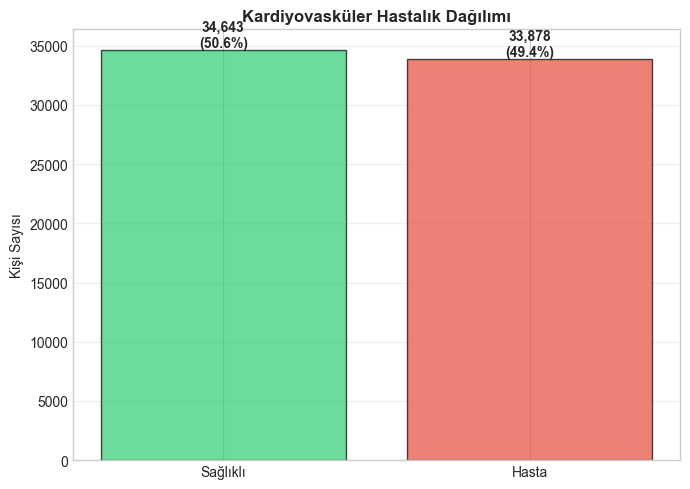

In [4]:
# Hedef değişkenin dağılımı - Bar Grafik
counts = df['cardio'].value_counts().sort_index()
labels = ['Sağlıklı', 'Hasta']
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=colors, edgecolor='black', alpha=0.7)
plt.title('Kardiyovasküler Hastalık Dağılımı', fontweight='bold')
plt.ylabel('Kişi Sayısı')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(counts):
    plt.text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

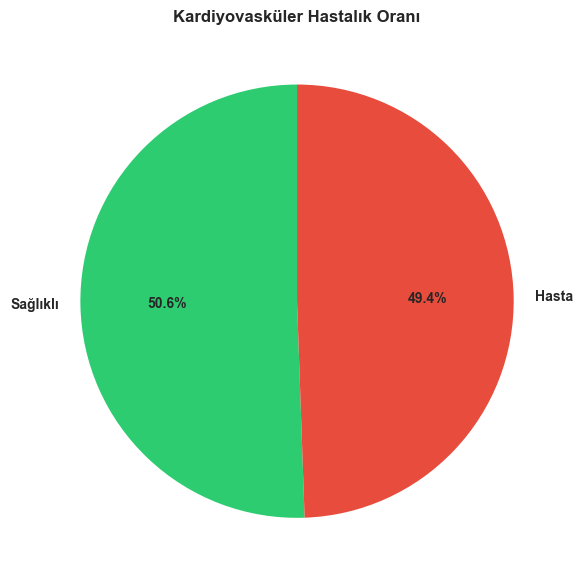

In [ ]:
# Hedef değişkenin dağılımı - Pasta Grafik
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontweight': 'bold'}
)
plt.title('Kardiyovasküler Hastalık Oranı', fontweight='bold')

plt.tight_layout()
plt.show()

## 2.4. Yaş Dağılımı ve Hastalık İlişkisi

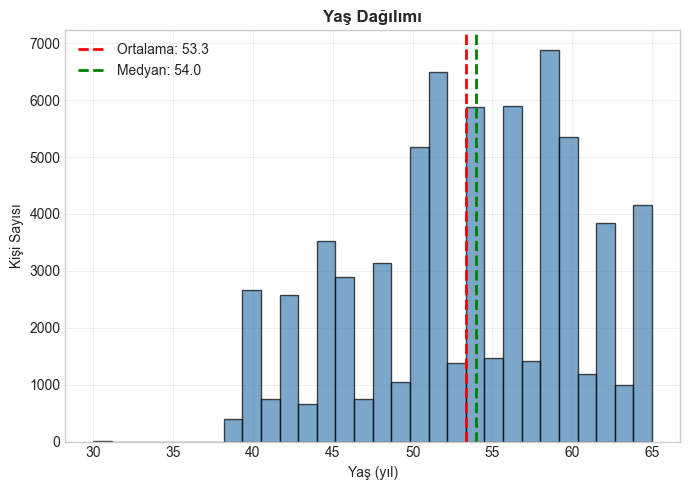

In [6]:
# Yaş dağılımı - Histogram
mean_age = df['age_years'].mean()
median_age = df['age_years'].median()

plt.figure(figsize=(7, 5))
plt.hist(df['age_years'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Ortalama: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f'Medyan: {median_age:.1f}')

plt.title('Yaş Dağılımı', fontweight='bold')
plt.xlabel('Yaş (yıl)')
plt.ylabel('Kişi Sayısı')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

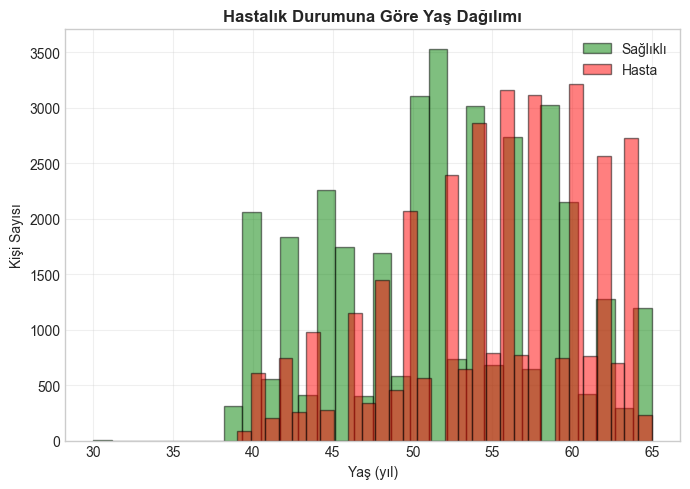

In [7]:
# Yaş dağılımı - Hastalık durumuna göre
plt.figure(figsize=(7, 5))

plt.hist(df.loc[df['cardio'] == 0, 'age_years'],
         bins=30, alpha=0.5, label='Sağlıklı',
         color='green', edgecolor='black')

plt.hist(df.loc[df['cardio'] == 1, 'age_years'],
         bins=30, alpha=0.5, label='Hasta',
         color='red', edgecolor='black')

plt.title('Hastalık Durumuna Göre Yaş Dağılımı', fontweight='bold')
plt.xlabel('Yaş (yıl)')
plt.ylabel('Kişi Sayısı')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 2.5. Cinsiyet ve Hastalık İlişkisi

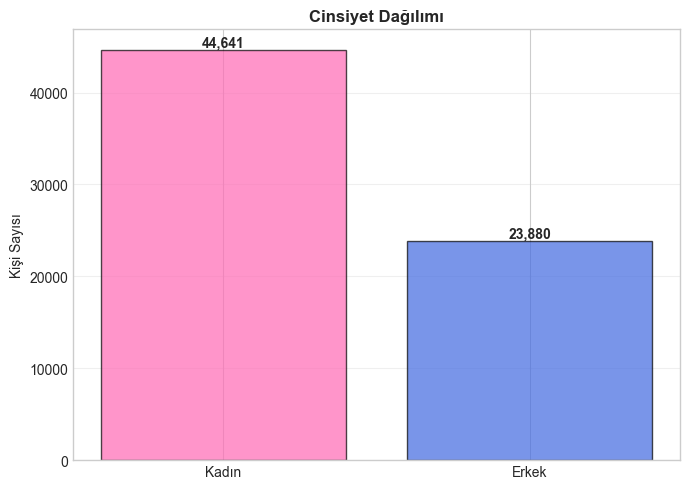

In [9]:
# Cinsiyet dağılımı - Bar Grafik
gender_counts = df['gender'].value_counts().sort_index()
labels = ['Kadın', 'Erkek']
colors = ['#ff69b4', '#4169e1']

plt.figure(figsize=(7, 5))
plt.bar(labels, gender_counts, color=colors, alpha=0.7, edgecolor='black')
plt.title('Cinsiyet Dağılımı', fontweight='bold')
plt.ylabel('Kişi Sayısı')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(gender_counts):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

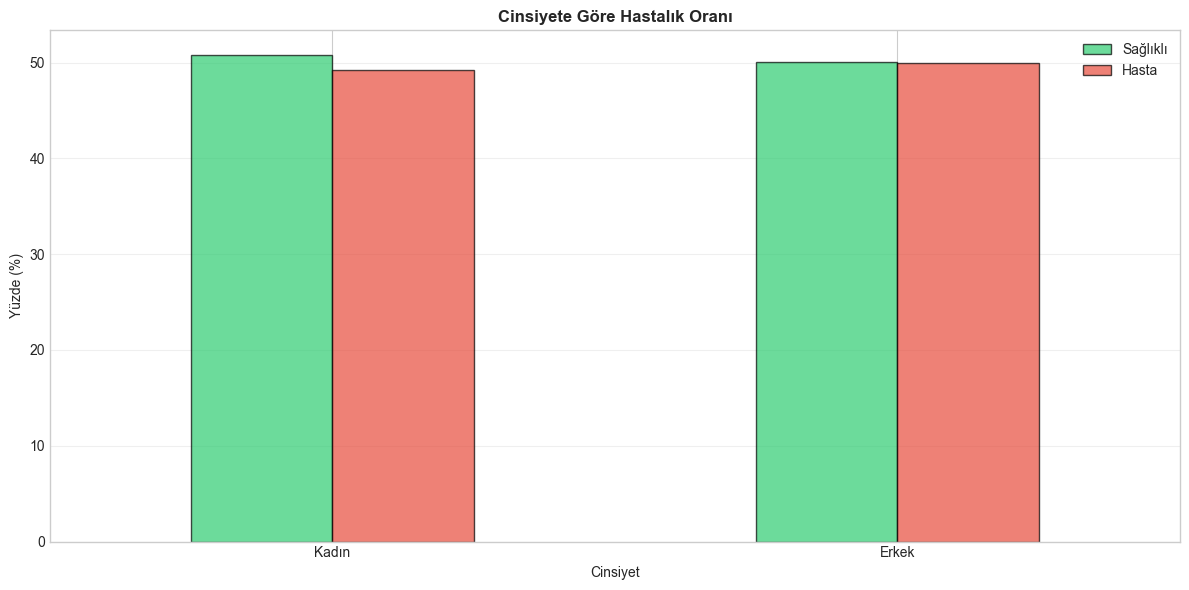

In [10]:
# Cinsiyete göre hastalık oranı - Yüzde Bar Grafik
gender_cardio = (
    pd.crosstab(df['gender'], df['cardio'], normalize='index') * 100
).sort_index()

plt.figure(figsize=(7, 5))
gender_cardio.plot(
    kind='bar',
    color=['#2ecc71', '#e74c3c'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('Cinsiyete Göre Hastalık Oranı', fontweight='bold')
plt.xlabel('Cinsiyet')
plt.ylabel('Yüzde (%)')
plt.xticks([0, 1], ['Kadın', 'Erkek'], rotation=0)
plt.legend(['Sağlıklı', 'Hasta'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 2.6. BMI (Vücut Kitle İndeksi) Analizi

In [11]:
# Vücut Kitle İndeksi (BMI) kategorileri
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=['Zayıf', 'Normal', 'Fazla Kilolu', 'Obez']
)

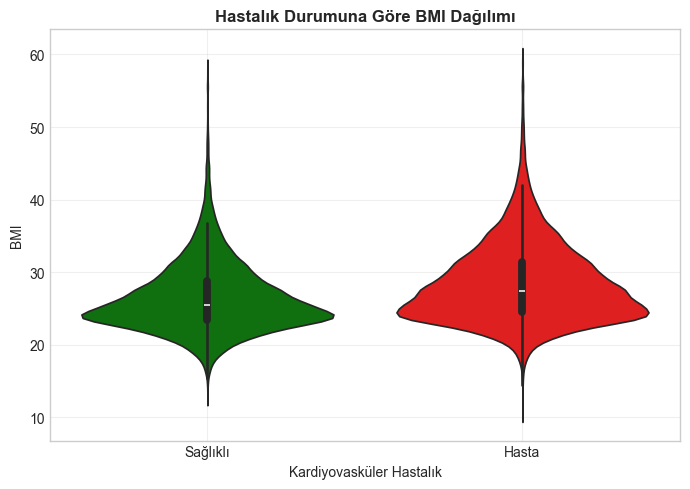

In [12]:
# BMI dağılımı - Hastalık durumuna göre - Violin Plot
plt.figure(figsize=(7, 5))
sns.violinplot(
    data=df,
    x='cardio',
    y='bmi',
    palette=['green', 'red']
)

plt.title('Hastalık Durumuna Göre BMI Dağılımı', fontweight='bold')
plt.xlabel('Kardiyovasküler Hastalık')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Sağlıklı', 'Hasta'])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 700x500 with 0 Axes>

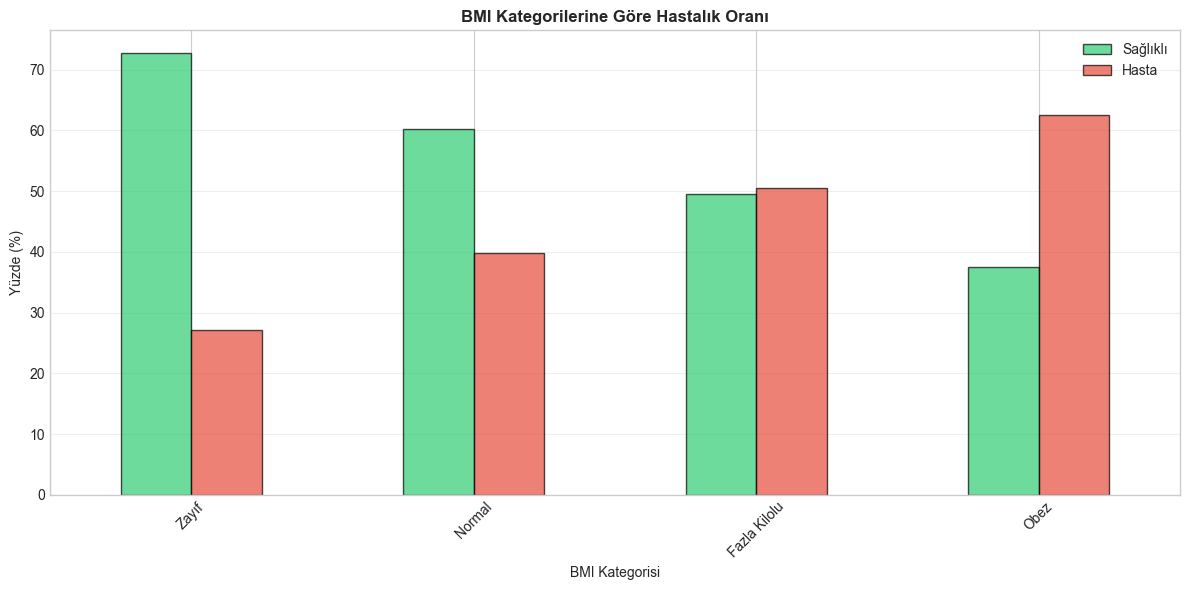

In [13]:
# BMI kategorilerine göre hastalık oranı - Yüzde Bar Grafik
bmi_order = ['Zayıf', 'Normal', 'Fazla Kilolu', 'Obez']

bmi_cardio = (
    pd.crosstab(df['bmi_category'], df['cardio'], normalize='index') * 100
).reindex(bmi_order)

plt.figure(figsize=(7, 5))
bmi_cardio.plot(
    kind='bar',
    color=['#2ecc71', '#e74c3c'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('BMI Kategorilerine Göre Hastalık Oranı', fontweight='bold')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Yüzde (%)')
plt.legend(['Sağlıklı', 'Hasta'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 2.7. Kan Basıncı Analizi

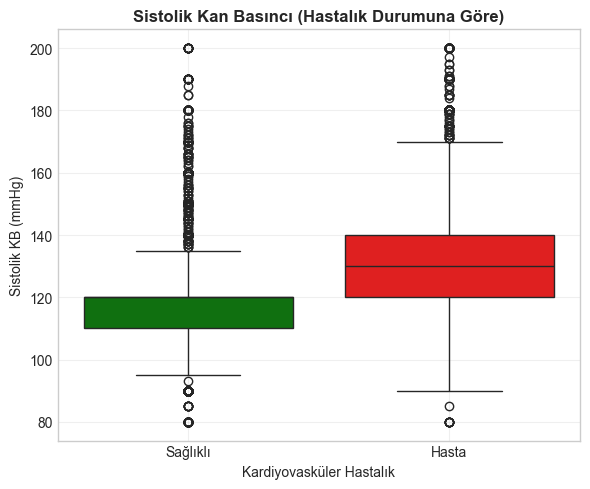

In [14]:
# Sistolik kan basıncı dağılımı - Box Plot
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x='cardio',
    y='ap_hi',
    palette=['green', 'red']
)

plt.title('Sistolik Kan Basıncı (Hastalık Durumuna Göre)', fontweight='bold')
plt.xlabel('Kardiyovasküler Hastalık')
plt.ylabel('Sistolik KB (mmHg)')
plt.xticks([0, 1], ['Sağlıklı', 'Hasta'])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

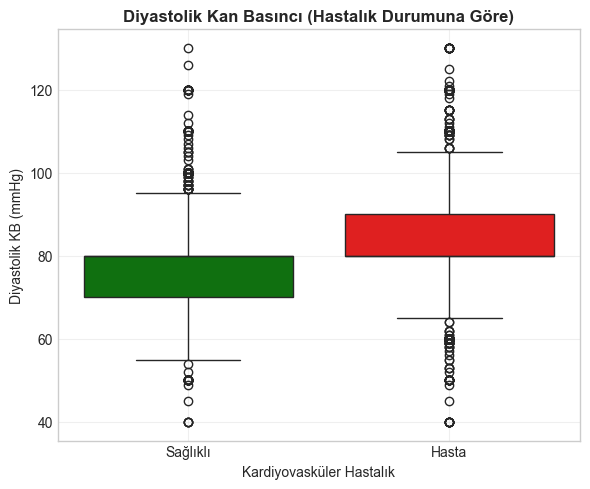

In [15]:
# Diyastolik kan basıncı dağılımı - Box Plot
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x='cardio',
    y='ap_lo',
    palette=['green', 'red']
)

plt.title('Diyastolik Kan Basıncı (Hastalık Durumuna Göre)', fontweight='bold')
plt.xlabel('Kardiyovasküler Hastalık')
plt.ylabel('Diyastolik KB (mmHg)')
plt.xticks([0, 1], ['Sağlıklı', 'Hasta'])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

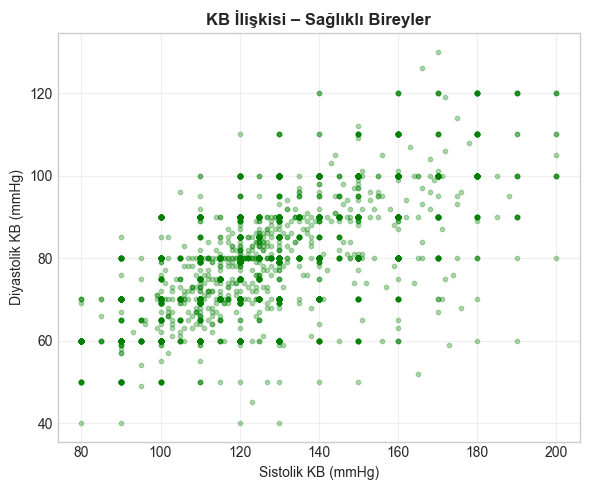

In [16]:
# Sistolik & Diyastolik İlişkisi (Sağlıklı)
healthy = df[df['cardio'] == 0]

plt.figure(figsize=(6, 5))
plt.scatter(
    healthy['ap_hi'],
    healthy['ap_lo'],
    alpha=0.3,
    s=10,
    color='green'
)

plt.title('KB İlişkisi – Sağlıklı Bireyler', fontweight='bold')
plt.xlabel('Sistolik KB (mmHg)')
plt.ylabel('Diyastolik KB (mmHg)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


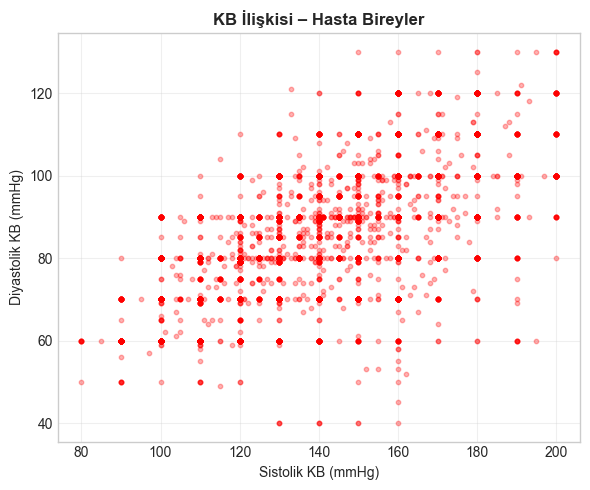

In [17]:
# Sistolik & Diyastolik İlişkisi (Hasta)
sick = df[df['cardio'] == 1]

plt.figure(figsize=(6, 5))
plt.scatter(
    sick['ap_hi'],
    sick['ap_lo'],
    alpha=0.3,
    s=10,
    color='red'
)

plt.title('KB İlişkisi – Hasta Bireyler', fontweight='bold')
plt.xlabel('Sistolik KB (mmHg)')
plt.ylabel('Diyastolik KB (mmHg)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 2.8. Yaşam Tarzı Faktörleri

<Figure size 600x500 with 0 Axes>

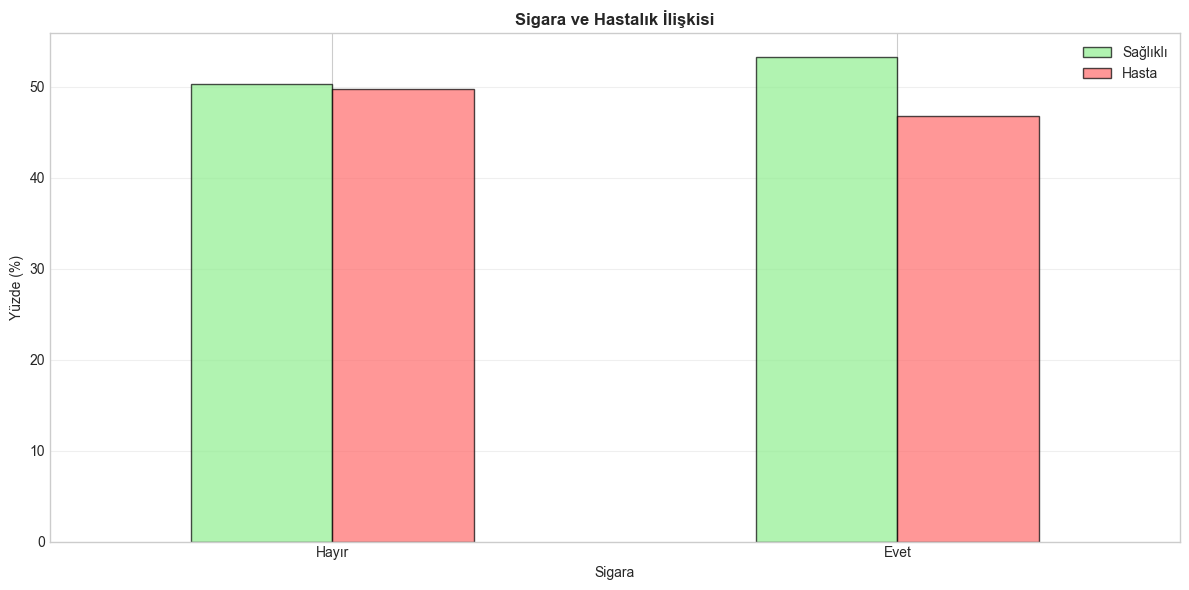

In [18]:
# Sigara ve Hastalık İlişkisi - Yüzde Bar Grafik
smoke_cardio = (
    pd.crosstab(df['smoke'], df['cardio'], normalize='index') * 100
)

plt.figure(figsize=(6, 5))
smoke_cardio.plot(
    kind='bar',
    color=['#90EE90', '#FF6B6B'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('Sigara ve Hastalık İlişkisi', fontweight='bold')
plt.xlabel('Sigara')
plt.ylabel('Yüzde (%)')
plt.xticks([0, 1], ['Hayır', 'Evet'], rotation=0)
plt.legend(['Sağlıklı', 'Hasta'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

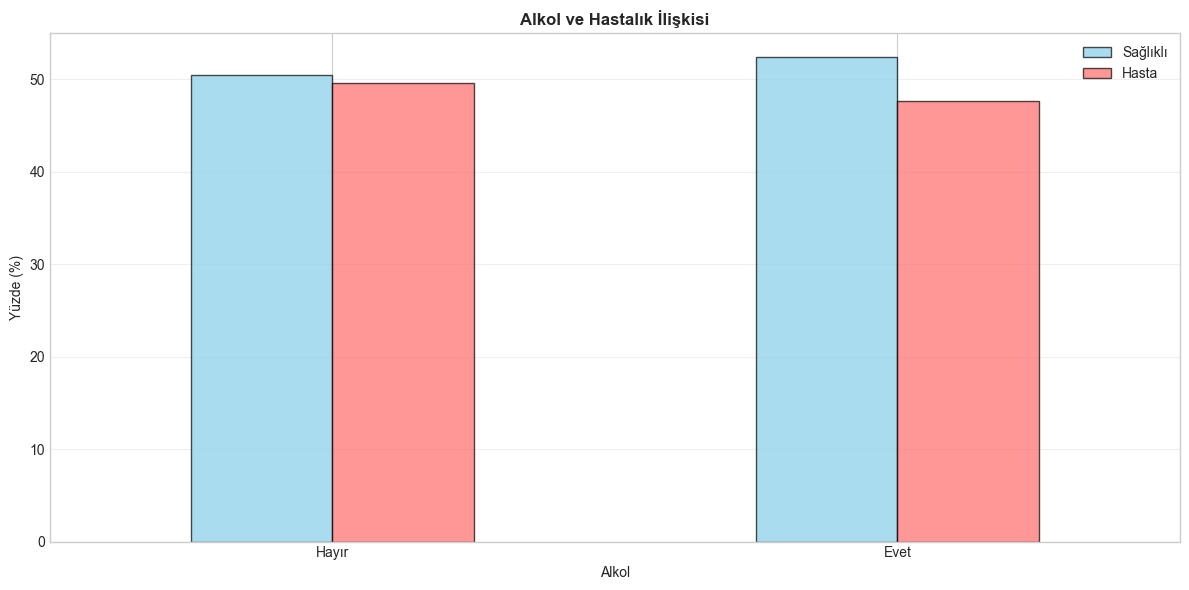

In [19]:
# Alkol ve Hastalık İlişkisi - Yüzde Bar Grafik
alco_cardio = (
    pd.crosstab(df['alco'], df['cardio'], normalize='index') * 100
)

plt.figure(figsize=(6, 5))
alco_cardio.plot(
    kind='bar',
    color=['#87CEEB', '#FF6B6B'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('Alkol ve Hastalık İlişkisi', fontweight='bold')
plt.xlabel('Alkol')
plt.ylabel('Yüzde (%)')
plt.xticks([0, 1], ['Hayır', 'Evet'], rotation=0)
plt.legend(['Sağlıklı', 'Hasta'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

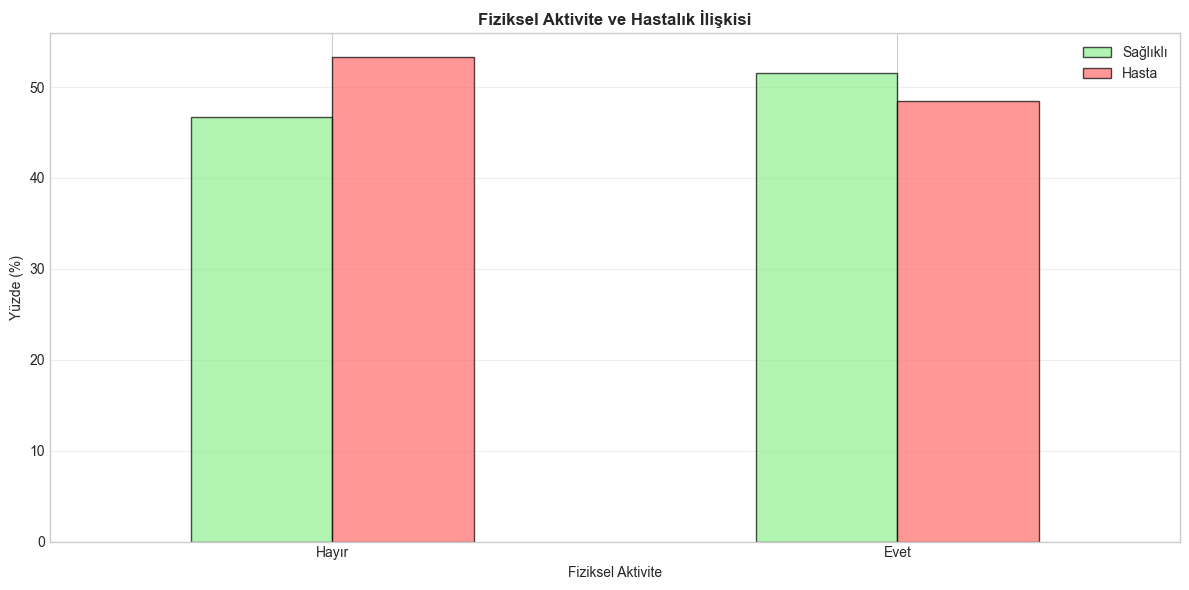

In [20]:
# Fiziksel Aktivite ve Hastalık İlişkisi - Yüzde Bar Grafik
active_cardio = (
    pd.crosstab(df['active'], df['cardio'], normalize='index') * 100
)

plt.figure(figsize=(6, 5))
active_cardio.plot(
    kind='bar',
    color=['#90EE90', '#FF6B6B'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('Fiziksel Aktivite ve Hastalık İlişkisi', fontweight='bold')
plt.xlabel('Fiziksel Aktivite')
plt.ylabel('Yüzde (%)')
plt.xticks([0, 1], ['Hayır', 'Evet'], rotation=0)
plt.legend(['Sağlıklı', 'Hasta'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 2.9. Kolesterol ve Glukoz Analizi

<Figure size 600x500 with 0 Axes>

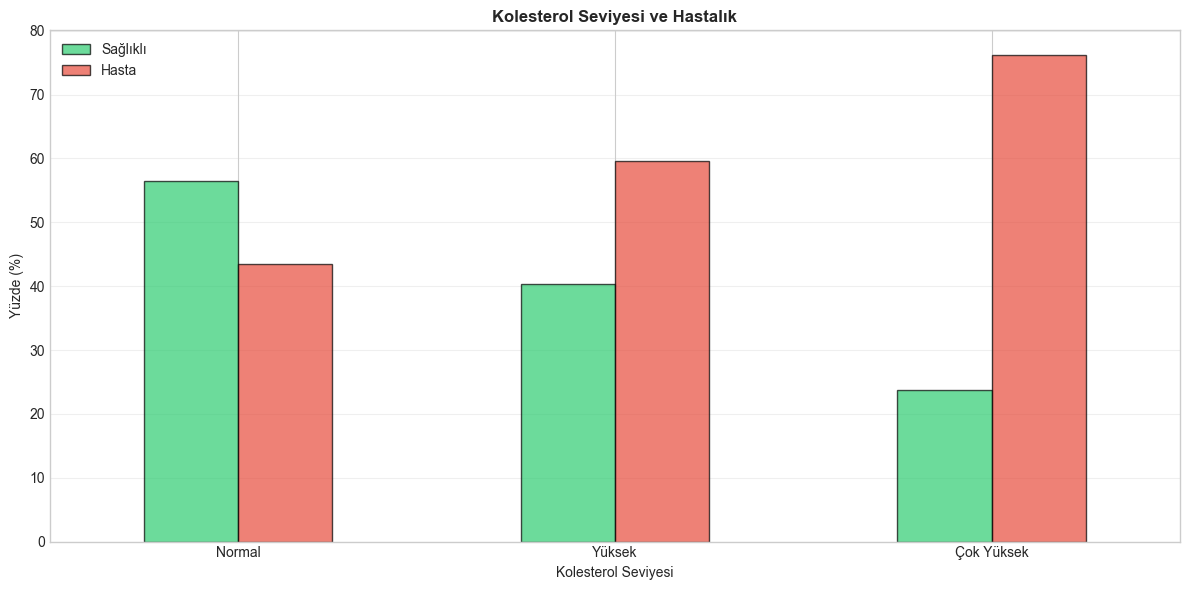

In [21]:
# Kolesterol ve Hastalık İlişkisi - Yüzde Bar Grafik
chol_cardio = (
    pd.crosstab(df['cholesterol'], df['cardio'], normalize='index') * 100
)

plt.figure(figsize=(6, 5))
chol_cardio.plot(
    kind='bar',
    color=['#2ecc71', '#e74c3c'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('Kolesterol Seviyesi ve Hastalık', fontweight='bold')
plt.xlabel('Kolesterol Seviyesi')
plt.ylabel('Yüzde (%)')
plt.xticks([0, 1, 2], ['Normal', 'Yüksek', 'Çok Yüksek'], rotation=0)
plt.legend(['Sağlıklı', 'Hasta'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

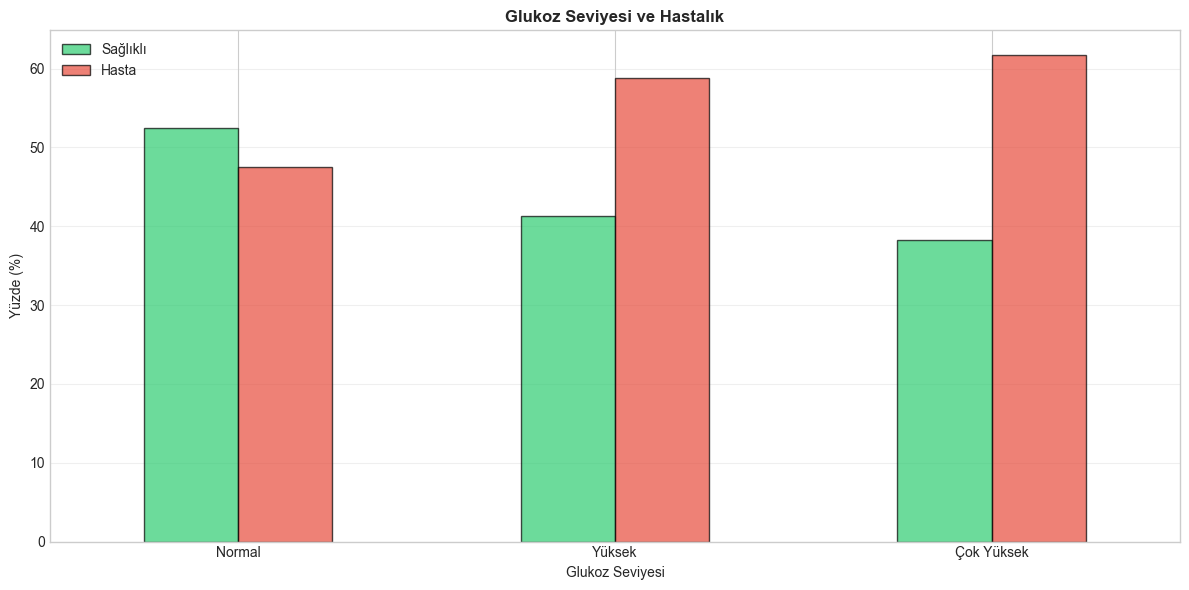

In [22]:
# Glukoz ve Hastalık İlişkisi - Yüzde Bar Grafik
gluc_cardio = (
    pd.crosstab(df['gluc'], df['cardio'], normalize='index') * 100
)

plt.figure(figsize=(6, 5))
gluc_cardio.plot(
    kind='bar',
    color=['#2ecc71', '#e74c3c'],
    alpha=0.7,
    edgecolor='black'
)

plt.title('Glukoz Seviyesi ve Hastalık', fontweight='bold')
plt.xlabel('Glukoz Seviyesi')
plt.ylabel('Yüzde (%)')
plt.xticks([0, 1, 2], ['Normal', 'Yüksek', 'Çok Yüksek'], rotation=0)
plt.legend(['Sağlıklı', 'Hasta'])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 2.10. Korelasyon Matrisi

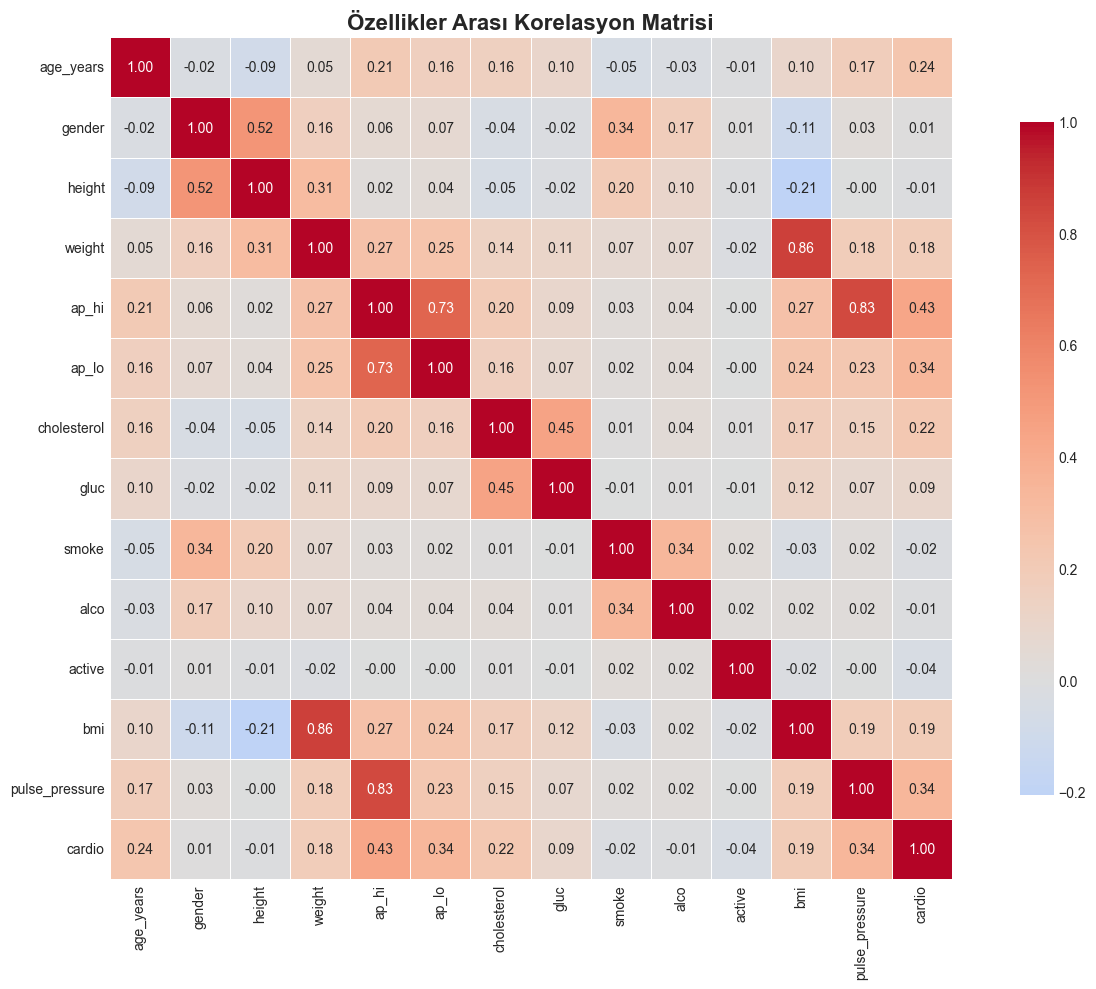

In [23]:
# Korelasyon Matrisi - Isı Haritası
numeric_features = [
    'age_years', 'gender', 'height', 'weight',
    'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
    'smoke', 'alco', 'active', 'bmi',
    'pulse_pressure', 'cardio'
]

corr = df[numeric_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Özellikler Arası Korelasyon Matrisi', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


In [24]:
# Hedef değişken (cardio) ile korelasyonlar
cardio_corr = corr['cardio'].drop('cardio').sort_values(ascending=False)

print('Hedef değişken (cardio) ile korelasyonlar')
print('-' * 50)
print(cardio_corr)


Hedef değişken (cardio) ile korelasyonlar
--------------------------------------------------
ap_hi             0.430781
ap_lo             0.341277
pulse_pressure    0.338169
age_years         0.239111
cholesterol       0.221375
bmi               0.191202
weight            0.180858
gluc              0.089449
gender            0.007063
alco             -0.008460
height           -0.011916
smoke            -0.016482
active           -0.037798
Name: cardio, dtype: float64
